# Midterm Project: Heart Disease Classification Analysis
**Author:** Kellie Leopold  
**Date:** November 11, 2025  
**Objective:** The objective is to predict the risk of heart disease based on the dataset.


## Introduction
Heart disease is one of the leading causes of death worldwide. Early detection and risk prediction can help healthcare providers take preventive measures and improve patient outcomes. In this project, we use the UCI Heart Disease dataset to analyze patient data and build a classification model that predicts the risk of heart disease based on various health indicators such as age, blood pressure, cholesterol levels, and lifestyle factors.

Our objective is to apply machine learning classification techniques to:  
* Explore and understand the dataset.
* Prepare and preprocess the data for modeling.
* Train and evaluate classification models to predict heart disease risk.
* Compare different classifiers and interpret their performance.

Through this analysis, we aim to demonstrate how predictive modeling can support clinical decision-making and identify the most influential factors contributing to heart disease risk.

## Imports
Import the necessary Python libraries for this notebook.  

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedShuffleSplit


from matplotlib.colors import ListedColormap

## Section 1. Load and Explore the Data
Load the UCI Heart Disease Dataset and explore the data.

In [198]:
# Load UCI Heart Disease dataset directly into a DataFrame
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
    names=column_names,
    na_values='?'
)

# Save a local copy in the notebook's data folder
data.to_csv('data/heart_disease.csv', index=False)

# Display the first 10 rows to verify the data
data.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [199]:
# Check for missing values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [200]:
# Display summary statistics
print(data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.8750

## Section 2. Data Exploration and Preparation
This section explores the dataset with charts and handles missing values

### 2.1 Explore Data Patterns and Distributions

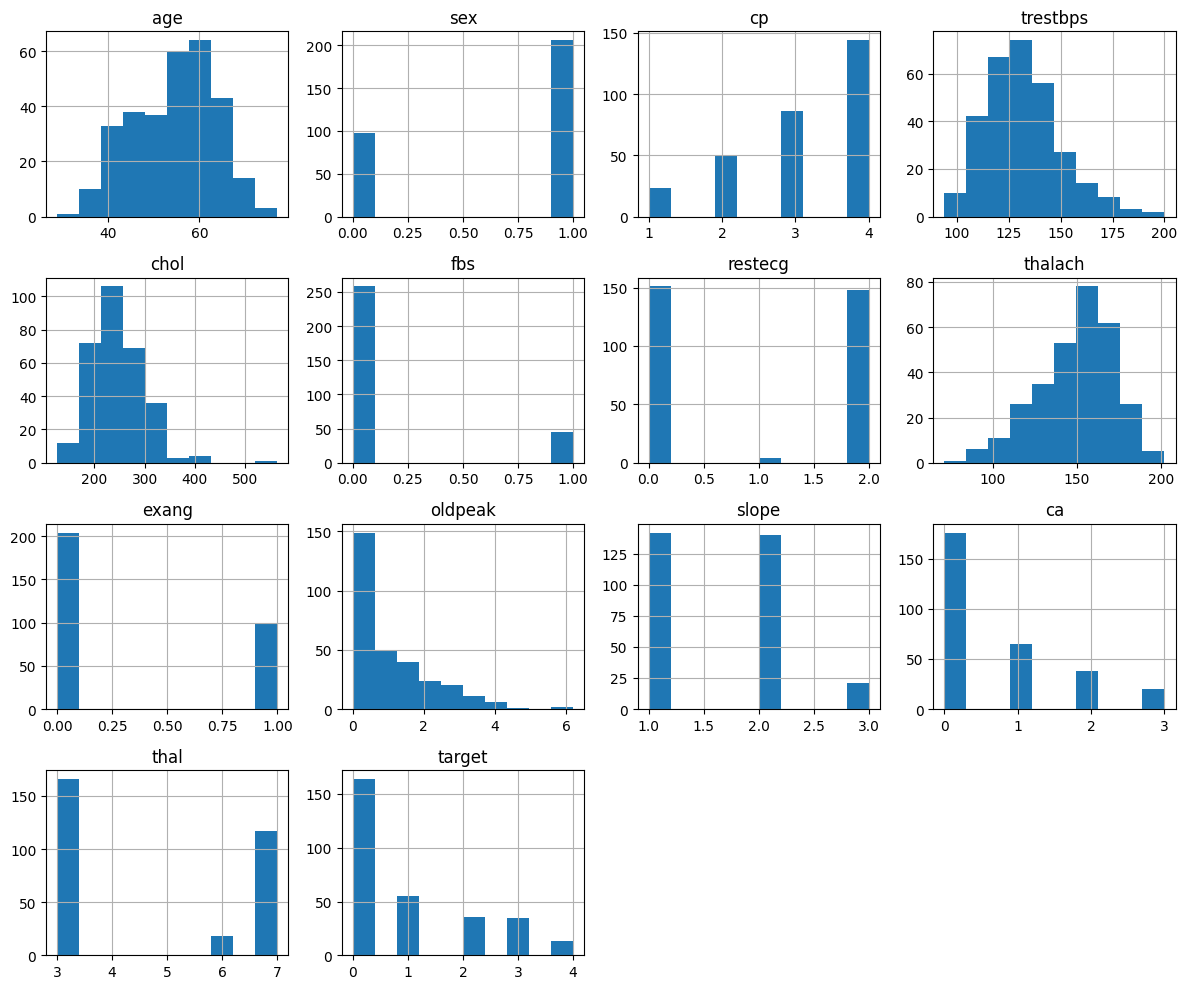

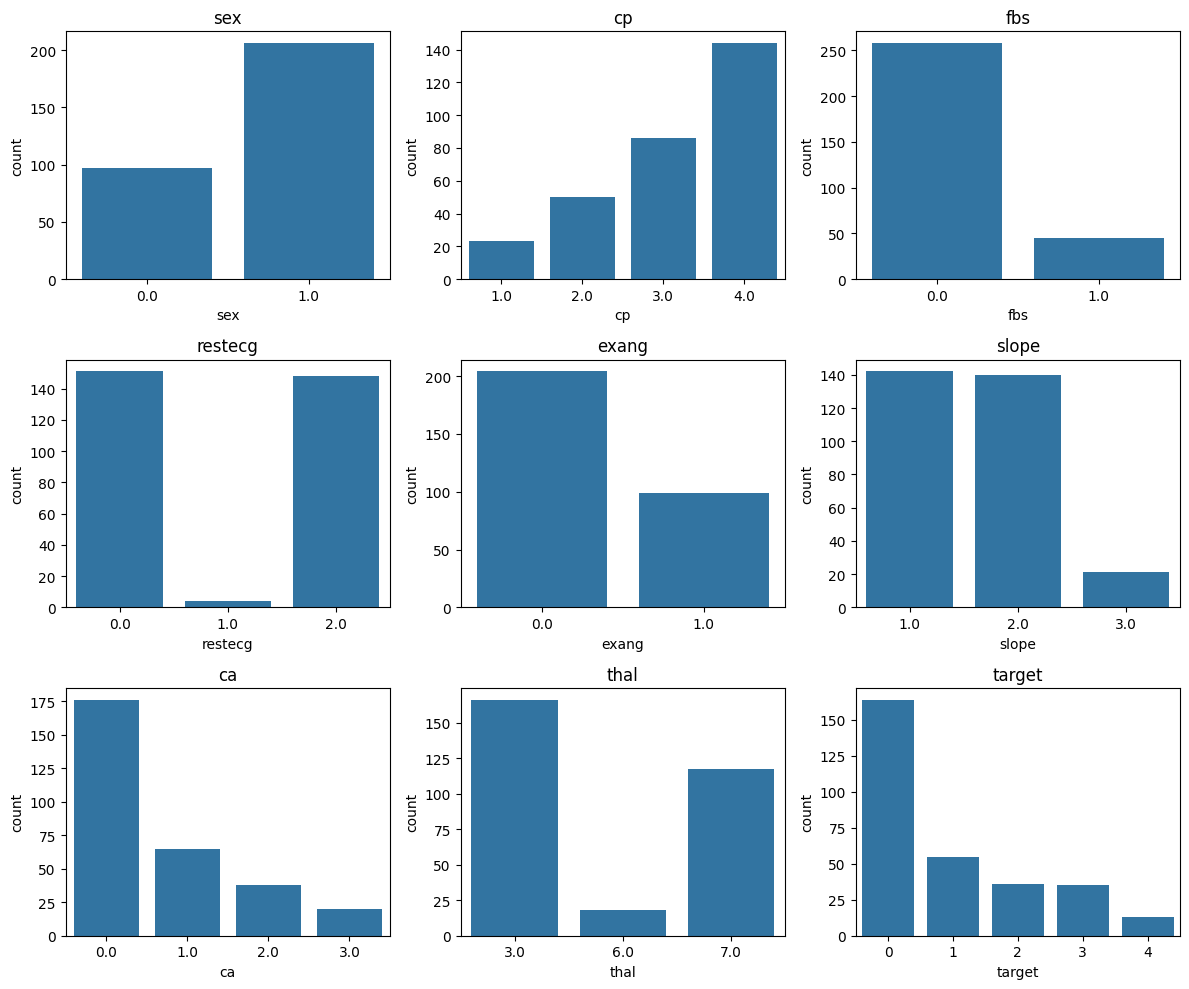

In [201]:
data.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

# Count plots for categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

fig, axes = plt.subplots(3, 3, figsize=(12, 10))  # 3x3 grid
for ax, col in zip(axes.flatten(), categorical_features):
    sns.countplot(x=col, data=data, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

### 2.2 Handle Missing Values

In [202]:
# Ensure 'ca' and 'thal' are numeric
data['ca'] = pd.to_numeric(data['ca'], errors='coerce')
data['thal'] = pd.to_numeric(data['thal'], errors='coerce')

# Fill missing values with median
data = data.copy()
data['ca'] = data['ca'].fillna(data['ca'].median())
data['thal'] = data['thal'].fillna(data['thal'].median())

# Verify no missing values remain
print(data.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### 2.3 Feature Engineering

In [203]:
# Map 'sex' to meaningful labels (already numeric: 1 = male, 0 = female)
data['sex_label'] = data['sex'].map({1: 'male', 0: 'female'})

# Create age groups: young (<40), middle-aged (40-60), senior (>60)
data['age_group'] = pd.cut(
    data['age'], bins=[0, 40, 60, 120], labels=['young', 'middle', 'senior']
)

# Create blood pressure level feature using resting blood pressure (trestbps)
data['bp_level'] = pd.cut(
    data['trestbps'],
    bins=[0, 120, 140, 200],
    labels=['normal', 'elevated', 'high']
)

# Convert categorical features to numeric labels for modeling
data['age_group_label'] = data['age_group'].map({'young': 0, 'middle': 1, 'senior': 2})
data['bp_level_label'] = data['bp_level'].map({'normal': 0, 'elevated': 1, 'high': 2})

# Define feature cases
X_case1 = data[['age_group_label']].dropna()
y_case1 = data.loc[X_case1.index, 'target']

X_case2 = data[['bp_level_label']].dropna()
y_case2 = data.loc[X_case2.index, 'target']

X_case3 = data[['sex']].dropna()  # numeric: 1 = male, 0 = female
y_case3 = data.loc[X_case3.index, 'target']

# Display updated feature matrix shapes
print("\nFeature matrix shapes:")
print(f"X_case1: {X_case1.shape}, y_case1: {y_case1.shape}")
print(f"X_case2: {X_case2.shape}, y_case2: {y_case2.shape}")
print(f"X_case3: {X_case3.shape}, y_case3: {y_case3.shape}")

# Display first few rows to verify
data[['age', 'age_group', 'age_group_label', 'trestbps', 'bp_level', 'bp_level_label', 'sex', 'sex_label']].head(10)


Feature matrix shapes:
X_case1: (303, 1), y_case1: (303,)
X_case2: (303, 1), y_case2: (303,)
X_case3: (303, 1), y_case3: (303,)


,age,age_group,age_group_label,trestbps,bp_level,bp_level_label,sex,sex_label
0,63.0,senior,2,145.0,high,2,1.0,male
1,67.0,senior,2,160.0,high,2,1.0,male
2,67.0,senior,2,120.0,normal,0,1.0,male
3,37.0,young,0,130.0,elevated,1,1.0,male
4,41.0,middle,1,130.0,elevated,1,0.0,female
5,56.0,middle,1,120.0,normal,0,1.0,male
6,62.0,senior,2,140.0,elevated,1,0.0,female
7,57.0,middle,1,120.0,normal,0,0.0,female
8,63.0,senior,2,130.0,elevated,1,1.0,male
9,53.0,middle,1,140.0,elevated,1,1.0,male


**Reflection 2**

## Section 3. Feature Selection and Justification

In this section, we select input features (predictors) and the target variable for our classification analysis. 

- The target variable is `target`, which indicates the presence or absence of heart disease (0 = <50% narrowing, 1 = >50% narrowing).  
- We will explore different input features individually to understand their predictive power.  
- We define three input cases using single features:
  - **Case 1:** `age_group` – categorizes patients into age brackets (young, middle, senior).  
  - **Case 2:** `bp_level` – categorizes resting blood pressure levels (normal, elevated, high).  
  - **Case 3:** `chol` – total serum cholesterol in mg/dl

### 3.1 Choose Features and Target

In [204]:
# Case 1: Feature = age_group (numeric label)
X_case1 = data[['age_group_label']]
y_case1 = data['target']

# Case 2: Feature = bp_level (numeric label)
X_case2 = data[['bp_level_label']]
y_case2 = data['target']

# Case 3: Feature = chol (numerical, no conversion needed)
X_case3 = data[['chol']]
y_case3 = data['target']

## Section 4. Train a Classification Model (Decision Tree)

### 4.1 Split the Data  

Split the data into training and test sets.

In [205]:
# Case 1: Feature = alone
splitter1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx1, test_idx1 in splitter1.split(X1, y1):

    X1_train = X1.iloc[train_idx1]
    X1_test  = X1.iloc[test_idx1]
    y1_train = y1.iloc[train_idx1]
    y1_test  = y1.iloc[test_idx1]

print('Case 1 - Alone:')
print('Train size:', len(X1_train), '| Test size:', len(X1_test))

NameError: name 'X1' is not defined

In [ ]:
# Case 2: Feature = age
splitter2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx2, test_idx2 in splitter2.split(X2, y2):
    X2_train = X2.iloc[train_idx2]
    X2_test  = X2.iloc[test_idx2]
    y2_train = y2.iloc[train_idx2]
    y2_test  = y2.iloc[test_idx2]

print('Case 2 - Age:')
print('Train size:', len(X2_train), '| Test size:', len(X2_test))

Case 2 - Age:
Train size: 712 | Test size: 179


In [ ]:
# Case 3: Features = age + family_size
splitter3 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx3, test_idx3 in splitter3.split(X3, y3):
    X3_train = X3.iloc[train_idx3]
    X3_test  = X3.iloc[test_idx3]
    y3_train = y3.iloc[train_idx3]
    y3_test  = y3.iloc[test_idx3]

print('Case 3 - Age + Family Size:')
print('Train size:', len(X3_train), '| Test size:', len(X3_test))

Case 3 - Age + Family Size:
Train size: 712 | Test size: 179


### 4.2 Create and Train Model (Decision Tree) 

Create and train a decision tree model with no random initializer argument.

In [ ]:
# CASE 1: Decision Tree using alone
tree_model1 = DecisionTreeClassifier()
tree_model1.fit(X1_train, y1_train)

# Print simple representation
print("Decision Tree - Case 1: Alone")
print(tree_model1)

Decision Tree - Case 1: Alone
DecisionTreeClassifier()


In [ ]:
# CASE 2: Decision Tree using age
tree_model2 = DecisionTreeClassifier()
tree_model2.fit(X2_train, y2_train)

print("Decision Tree - Case 2: Age")
print(tree_model2)

Decision Tree - Case 2: Age
DecisionTreeClassifier()


In [ ]:
# CASE 3: Decision Tree using age and family_size
tree_model3 = DecisionTreeClassifier()
tree_model3.fit(X3_train, y3_train)

plt.figure(figsize=(16,8))
plot_tree(tree_model3,
          feature_names=X3.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 3: Age + Family Size")
plt.show()

Decision Tree - Case 3: Age + Family Size
DecisionTreeClassifier()


### 4.3 Predict and Evaluate Model Performance  

Predict and evaluate all three cases.

In [ ]:
# Predict on training data
y1_pred = tree_model1.predict(X1_train)
print("Results for Decision Tree on training data (Case 1 - alone):")
print(classification_report(y1_train, y1_pred))

# Predict on test data
y1_test_pred = tree_model1.predict(X1_test)
print("Results for Decision Tree on test data (Case 1 - alone):")
print(classification_report(y1_test, y1_test_pred))

Results for Decision Tree on training data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712

Results for Decision Tree on test data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [ ]:
# Predict on training data
y2_pred = tree_model2.predict(X2_train)
print("Results for Decision Tree on training data (Case 2 - age):")
print(classification_report(y2_train, y2_pred))

# Predict on test data
y2_test_pred = tree_model2.predict(X2_test)
print("Results for Decision Tree on test data (Case 2 - age):")
print(classification_report(y2_test, y2_test_pred))

Results for Decision Tree on training data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       439
           1       0.69      0.29      0.41       273

    accuracy                           0.68       712
   macro avg       0.68      0.61      0.60       712
weighted avg       0.68      0.68      0.64       712

Results for Decision Tree on test data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       110
           1       0.50      0.17      0.26        69

    accuracy                           0.61       179
   macro avg       0.57      0.53      0.50       179
weighted avg       0.58      0.61      0.55       179



In [ ]:
# Predict on training data
y3_pred = tree_model3.predict(X3_train)
print("Results for Decision Tree on training data (Case 3 - age + family_size):")
print(classification_report(y3_train, y3_pred))

# Predict on test data
y3_test_pred = tree_model3.predict(X3_test)
print("Results for Decision Tree on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_test_pred))

Results for Decision Tree on training data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712

Results for Decision Tree on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       110
           1       0.45      0.33      0.38        69

    accuracy                           0.59       179
   macro avg       0.55      0.54      0.54       179
weighted avg       0.57      0.59      0.57       179



### 4.4 Report Confusion Matrix (as a heatmap)  

Plot for all cases.

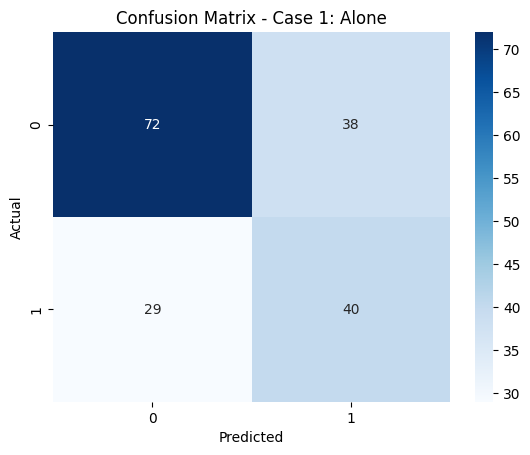

In [ ]:
# Create confusion matrix for test predictions (Case 1)
cm1 = confusion_matrix(y1_test, y1_test_pred)

# Plot heatmap
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 1: Alone')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

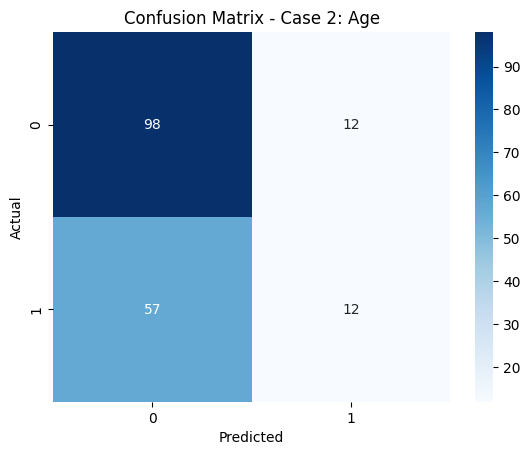

In [ ]:
# Create confusion matrix for test predictions (Case 2)
cm2 = confusion_matrix(y2_test, y2_test_pred)

# Plot heatmap
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 2: Age')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

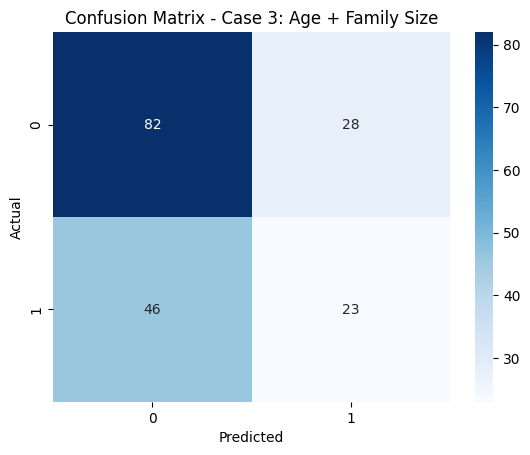

In [ ]:
# Create confusion matrix for test predictions (Case 3)
cm3 = confusion_matrix(y3_test, y3_test_pred)

# Plot heatmap
sns.heatmap(cm3, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 3: Age + Family Size')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4.5 Report Decision Tree Plot  

Plot the decision tree model for each case. 

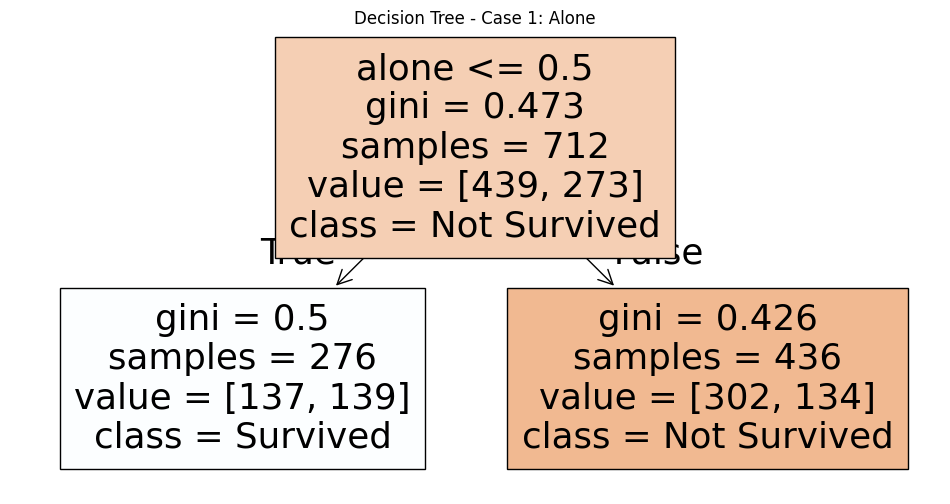

In [ ]:
# Plot Decision Tree for Case 1
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model1,
          feature_names=X1.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 1: Alone")
plt.show()

# Save image
fig.savefig("tree_case1_alone.png")

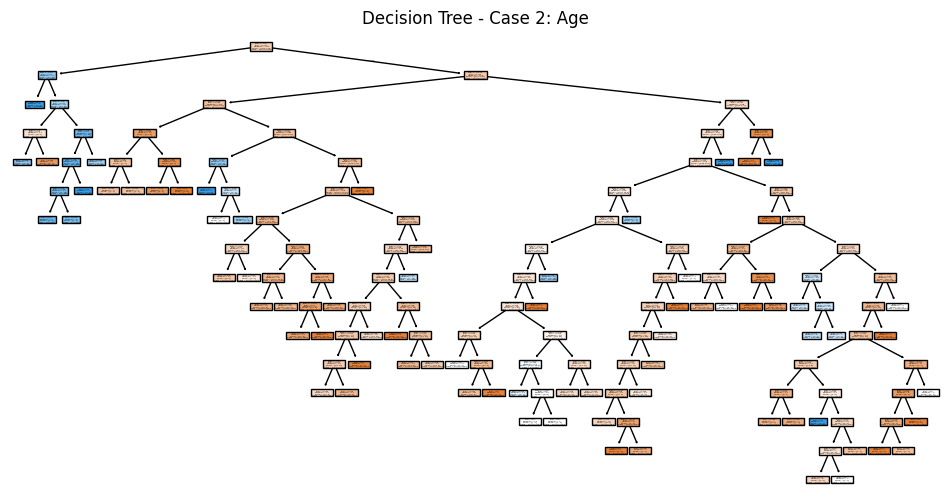

In [ ]:
# Plot Decision Tree for Case 2
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model2,
          feature_names=X2.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 2: Age")
plt.show()

# Save image
fig.savefig("tree_case2_age.png")

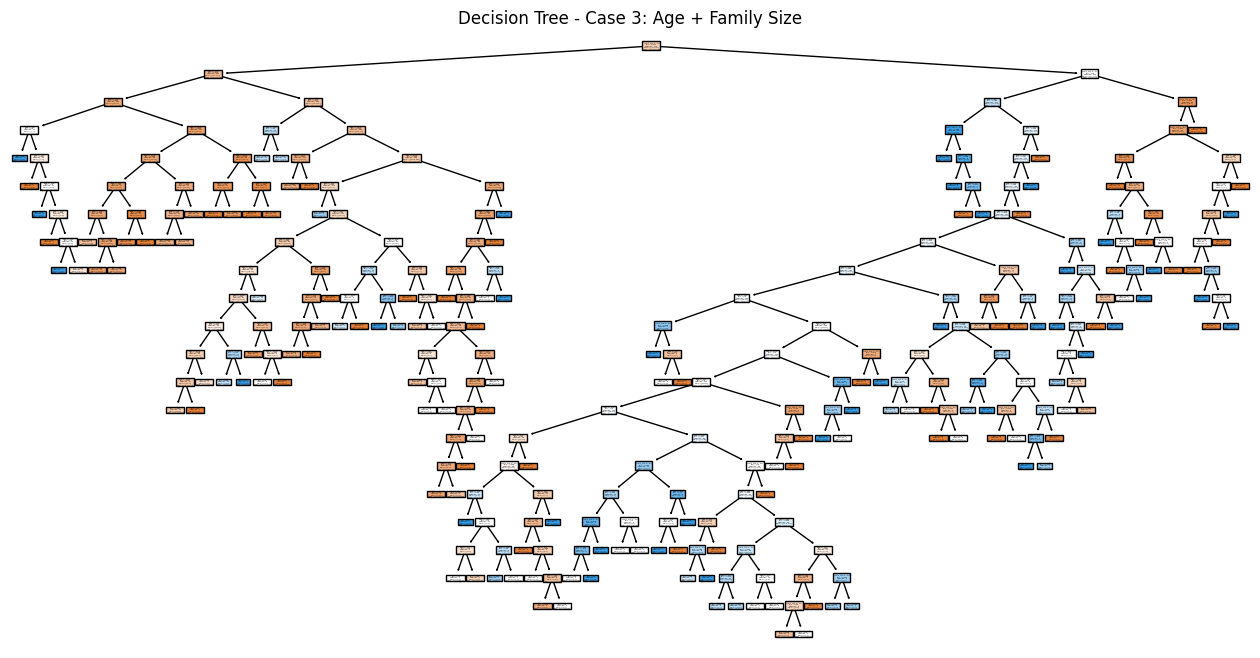

In [ ]:
# Plot Decision Tree for Case 3
fig = plt.figure(figsize=(16, 8))
plot_tree(tree_model3,
          feature_names=X3.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.title("Decision Tree - Case 3: Age + Family Size")
plt.show()

# Save image
fig.savefig("tree_case3_age_family.png")

**Interpretation**  

The Decision Tree models show how different features affect survival. The first tree, using only alone, shows that people who were not alone were more likely to survive. The second tree, using age, shows that younger passengers had better chances. The third tree, which used age and family size, gave the most complete picture. This shows that both being young and having family nearby could increase survival odds.

**Reflection 4**

Overall, the three cases performed differently. Using only the alone feature gave the weakest results, while age alone improved performance slightly. The combination of age and family size worked best because it provided more context about both a passenger’s vulnerability and social support. It was somewhat surprising that being alone was not as predictive as expected, but adding family size made the model noticeably more accurate.

## Section 5. Compare Alernative Models (SVC, NN)

In [ ]:
# RBF Kernel (default) - same as calling SVC()
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

# Linear Kernel
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Polynomial Kernel (e.g., with degree=3)
svc_model = SVC(kernel='poly', degree=3)
svc_model.fit(X_train, y_train)

# Sigmoid Kernel
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)

,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### 5.1 Train and Evaluate Model (SVC)  

In [ ]:
# CASE 1: SVC using 'alone'
svc_model1 = SVC()
svc_model1.fit(X1_train, y1_train)
y1_svc_pred = svc_model1.predict(X1_test)
print("Results for SVC on test data (Case 1 - alone):")
print(classification_report(y1_test, y1_svc_pred))

Results for SVC on test data (Case 1 - alone):
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



In [ ]:
# CASE 2: SVC using 'age'
svc_model2 = SVC()
svc_model2.fit(X2_train, y2_train)
y2_svc_pred = svc_model2.predict(X2_test)
print("Results for SVC on test data (Case 2 - age):")
print(classification_report(y2_test, y2_svc_pred))

Results for SVC on test data (Case 2 - age):
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



In [ ]:
# CASE 3: SVC using 'age' + 'family_size'
svc_model3 = SVC()
svc_model3.fit(X3_train, y3_train)
y3_svc_pred = svc_model3.predict(X3_test)
print("Results for SVC on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_svc_pred))

Results for SVC on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



### 5.2 Visualize Support Vectors (1D Case 1 & 2; 2D Case 3)  

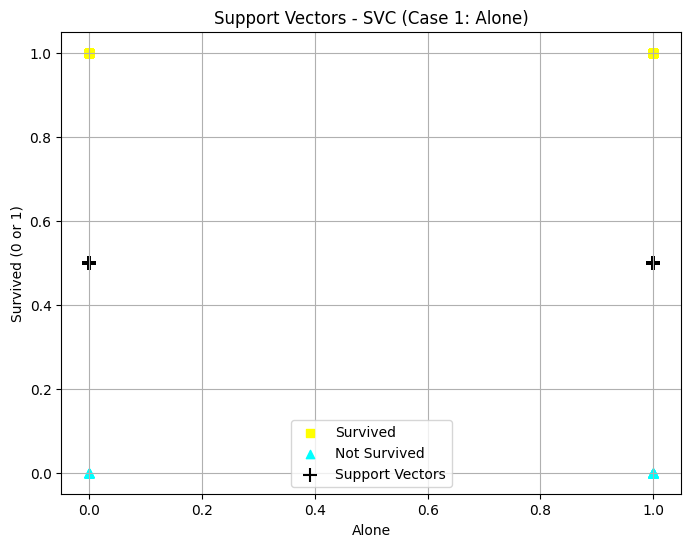

In [ ]:
# Visualize support vectors for Case 1 (feature = 'alone')

# Create groups based on survival
survived_alone = X1_test.loc[y1_test == 1, 'alone']
not_survived_alone = X1_test.loc[y1_test == 0, 'alone']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))

plt.scatter(survived_alone, y1_test.loc[y1_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_alone, y1_test.loc[y1_test == 0], c='cyan', marker='^', label='Not Survived')

# Overlay support vectors
# Check if the model has support_vectors_ (it may not if it failed to converge)
if hasattr(svc_model1, 'support_vectors_'):
    # Get the X-values of the support vectors (only one feature in Case 1
    support_x = svc_model1.support_vectors_[:, 0]  # First feature (alone)
    # Plot them using a fixed Y-value (0.5) to place them between classes visually
    # We use a larger size (s=100) and a plus symbol to make them stand out
    plt.scatter(support_x, [0.5] * len(support_x), c='black', marker='+', s=100, label='Support Vectors')

# Add labels and legend
plt.xlabel('Alone')
plt.ylabel('Survived (0 or 1)')
plt.title('Support Vectors - SVC (Case 1: Alone)')
plt.legend()
plt.grid(True)
plt.show()

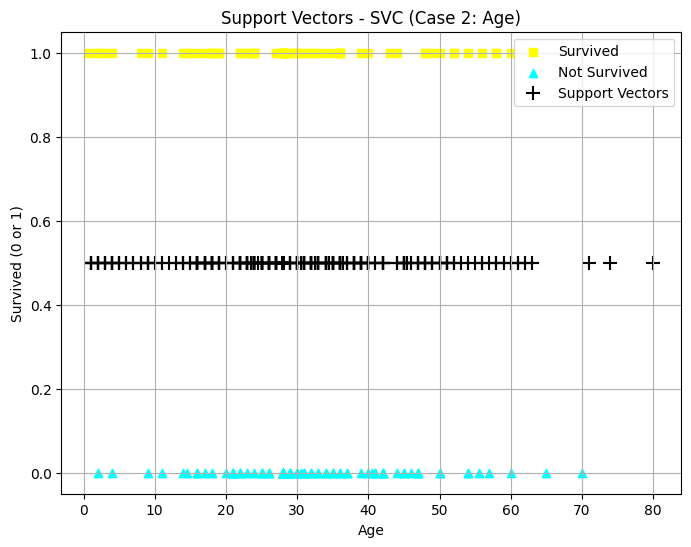

In [ ]:
# Visualize support vectors for Case 2 (feature = 'age')

# Create groups based on survival
survived_age = X2_test.loc[y2_test == 1, 'age']
not_survived_age = X2_test.loc[y2_test == 0, 'age']

# Create scatter plot
plt.figure(figsize=(8, 6))

plt.scatter(survived_age, y2_test.loc[y2_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_age, y2_test.loc[y2_test == 0], c='cyan', marker='^', label='Not Survived')

# Overlay support vectors (check that the model has them)
if hasattr(svc_model2, 'support_vectors_'):
    support_x = svc_model2.support_vectors_[:, 0]
    plt.scatter(support_x, [0.5] * len(support_x), c='black', marker='+', s=100, label='Support Vectors')

plt.xlabel('Age')
plt.ylabel('Survived (0 or 1)')
plt.title('Support Vectors - SVC (Case 2: Age)')
plt.legend()
plt.grid(True)
plt.show()

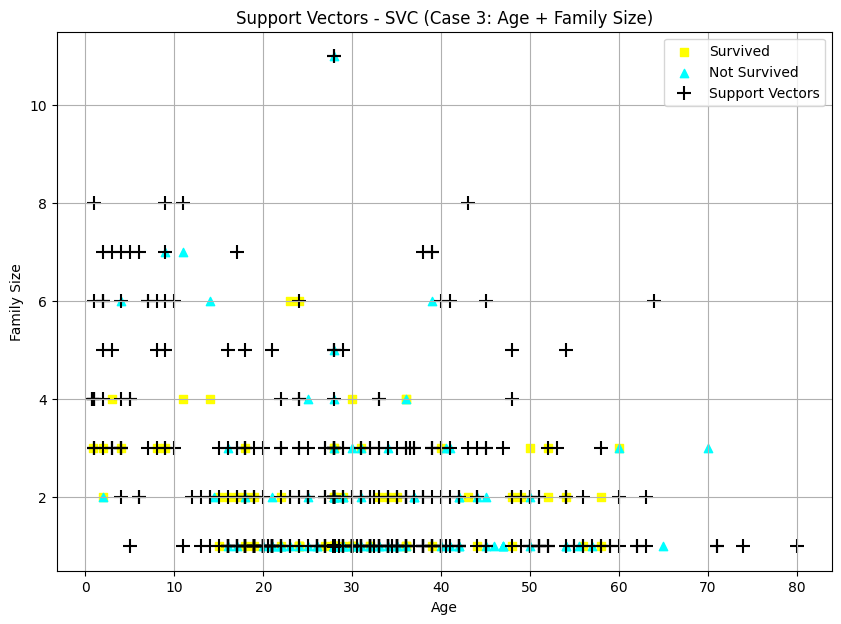

In [ ]:
# Visualize support vectors for Case 3 (features = 'age', 'family_size') - more interesting (two dimensional)

# Create groups based on survival
survived = X3_test[y3_test == 1]
not_survived = X3_test[y3_test == 0]

# Create scatter plot
plt.figure(figsize=(10, 7))

# Plot survived (yellow squares)
plt.scatter(survived['age'], survived['family_size'],
            c='yellow', marker='s', label='Survived')

# Plot not survived (cyan triangles)
plt.scatter(not_survived['age'], not_survived['family_size'],
            c='cyan', marker='^', label='Not Survived')

# Overlay support vectors
if hasattr(svc_model3, 'support_vectors_'):
    support_vectors = svc_model3.support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                c='black', marker='+', s=100, label='Support Vectors')

# Add labels, title, and legend
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.title('Support Vectors - SVC (Case 3: Age + Family Size)')
plt.legend()
plt.grid(True)
plt.show()

### 5.3 Train and Evaluate Model (Neural Network on Case 3)  

* An input (visible) layer  - with age and family size - that's two input neurons visible to us and the model.
* Three hidden layers with decreasing sizes (50, 25, 10) - These are layers of neurons the model creates to learn patterns. Each neuron receives input from all neurons in the previous layer, applies a function, and passes the result on.
* One output layer - a single neuron with our probability of survival (yes / no for a binary classification). 
* The lbgfs solver which works better with small data sets like the Titanic
* A higher number of maximum iterations (max_iter) to help it converge.
* A fixed random_state so the work is reproducible and doesn't change each time we run it.

In [ ]:
# Train NN for Case 3 (age + family_size)
nn_model3 = MLPClassifier(
    hidden_layer_sizes=(50, 25, 10),
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

nn_model3.fit(X3_train, y3_train)

,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


In [ ]:
# Predict on test data (Case 3)
y3_nn_pred = nn_model3.predict(X3_test)

# Print classification report
print("Results for Neural Network on test data (Case 3 - age + family_size):")
print(classification_report(y3_test, y3_nn_pred))

Results for Neural Network on test data (Case 3 - age + family_size):
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       110
           1       0.57      0.46      0.51        69

    accuracy                           0.66       179
   macro avg       0.64      0.62      0.63       179
weighted avg       0.65      0.66      0.65       179



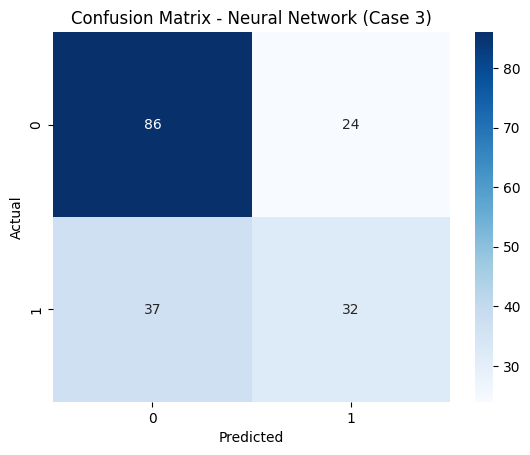

In [ ]:
# Create confusion matrix
cm_nn3 = confusion_matrix(y3_test, y3_nn_pred)

# Plot heatmap
sns.heatmap(cm_nn3, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Neural Network (Case 3)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### 5.3 Train and Evaluate Model (Neural Network on Case 3)  

c:\Repos\applied-ml-kjleopold\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


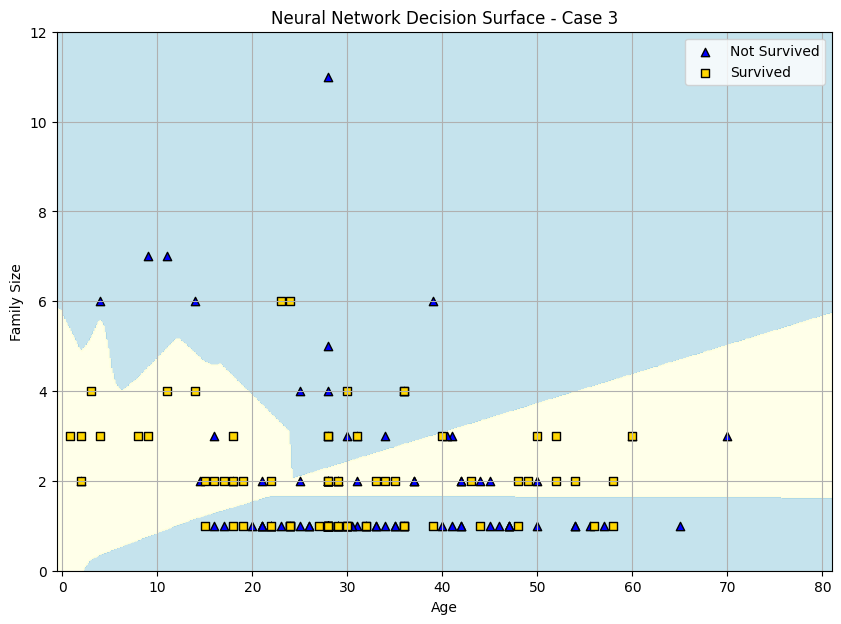

In [ ]:
# Get the range of our two features - use padding to enhance appearance
padding = 1
x_min, x_max = X3['age'].min() - padding, X3['age'].max() + padding
y_min, y_max = X3['family_size'].min() - padding, X3['family_size'].max() + padding

# Create a meshgrid (all combinations of age and family_size)
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Flatten the grid arrays and prepare them for prediction

Z = nn_model3.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted results to match the original 2D grid shape
Z = Z.reshape(xx.shape)

# Plot the decision surface (background) showing predicted survival zones

# Blue for 0, yellow for 1 - change this up as you like
plt.figure(figsize=(10, 7))
cmap_background = ListedColormap(['lightblue', 'lightyellow'])

plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.7)

# Overlay the actual test data points for visual comparison
# Plot passengers who did NOT survive (0) as blue triangles
plt.scatter(X3_test['age'][y3_test == 0], X3_test['family_size'][y3_test == 0], c='blue', marker='^', edgecolor='k', label='Not Survived')

# Plot passengers who DID survive (1) as gold squares
plt.scatter(X3_test['age'][y3_test == 1], X3_test['family_size'][y3_test == 1], c='gold', marker='s', edgecolor='k', label='Survived')

# Add axis labels, title, legend, and grid
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.title('Neural Network Decision Surface - Case 3')
plt.legend()
plt.grid(True)
plt.show()

**Reflection 5**

The models performed differently depending on the features we used. For the simple cases with just “alone” or “age,” all models did okay, but when we combined “age” and “family size,” the Neural Network did a better job of capturing patterns and separating survivors from non-survivors. It was interesting to see that even one feature like “alone” can give decent predictions, but adding more features makes the models smarter. The Neural Network might outperform the others here because it can handle more complex relationships, while the Decision Tree can overfit and the SVC depends a lot on how we choose its settings.

## Section 6. Final Thoughts & Insights

For this project, we looked at how three models, Decision Tree, SVC, and Neural Network, performed using different features: “alone,” “age,” and “age + family size.” Using just one feature like “alone” gave okay results, but combining features made the models work better, and the Neural Network handled the more complex patterns in Case 3 the best. Some challenges we ran into included missing data, figuring out how to visualize two-dimensional decision boundaries, and tuning the models for good results. Next steps could be trying other features like sex or pclass, experimenting with different SVC settings or Neural Network designs, and using cross-validation to see how stable the models are.